## Heart Diesease Classification

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Our goal is to create model using SVM to predict heart diesease classification. 

In [65]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
# Loading data
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'heartdisease']
clivelandData = pd.read_csv('data/cleveland.csv', names = features)
hungarianData = pd.read_csv('data/hungary.csv', names = features)
switzerlandData = pd.read_csv('data/switzerland.csv', names = features)

In [3]:
# let's combient three dataframes into one
datatemp = [clivelandData, hungarianData, switzerlandData]
data = pd.concat(datatemp)

In [4]:
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heartdisease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [86]:
data.heartdisease.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [5]:
data.isnull().sum()

age               0
sex               0
cp                0
trestbps          3
chol             23
fbs              83
restecg           2
thalach           2
exang             2
oldpeak           6
slope           207
ca              413
thal            320
heartdisease      0
dtype: int64

In [ ]:
#Let drop the column most number of Null values
data = data.drop(["ca", "slope", "thal"],axis=1)

<AxesSubplot:>

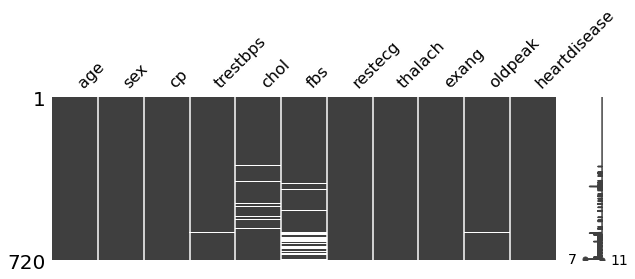

In [8]:
msno.matrix(data,figsize=(10,3))

<AxesSubplot:xlabel='sex', ylabel='heartdisease'>

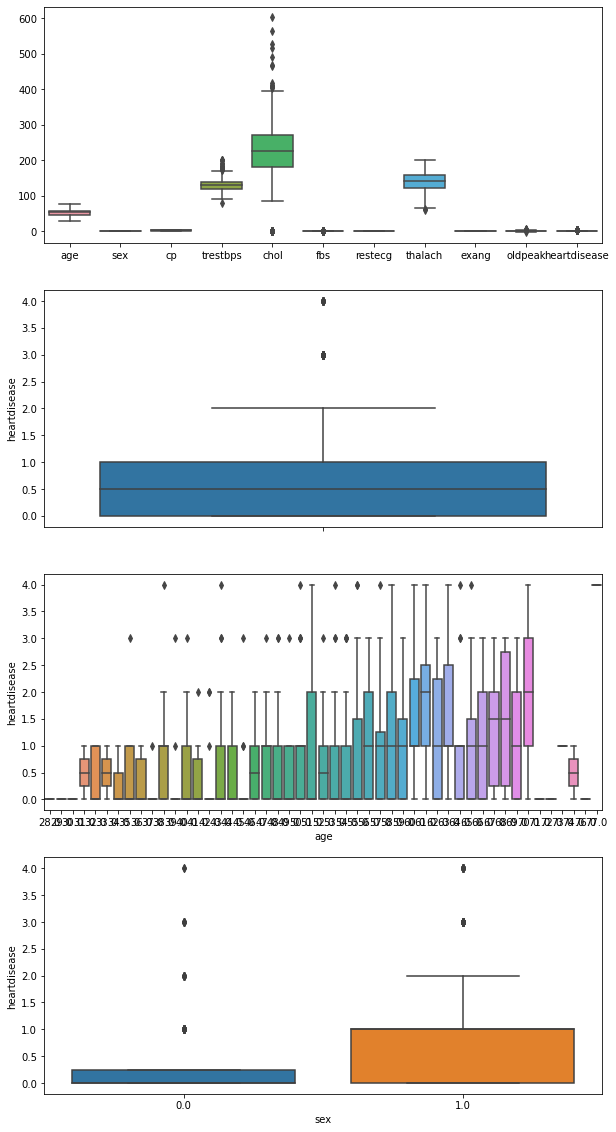

In [9]:
# Outliners detection and class imbalance
fig, axes = plt.subplots(nrows=4,ncols=1)
fig.set_size_inches(10, 20)
sn.boxplot(data=data,orient="v",ax=axes[0])
sn.boxplot(data=data,y="heartdisease",orient="v",ax=axes[1])
sn.boxplot(data=data,y="heartdisease",x="age",orient="v",ax=axes[2])
sn.boxplot(data=data,y="heartdisease",x="sex",orient="v",ax=axes[3])


<AxesSubplot:>

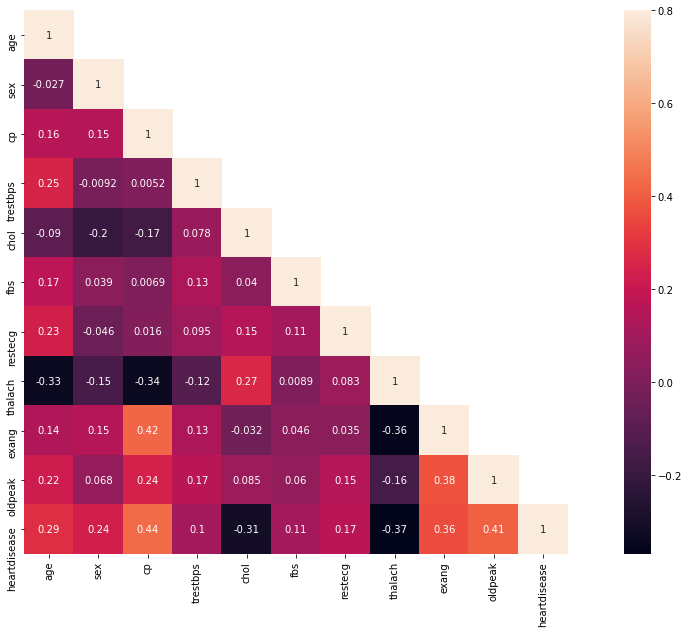

In [10]:
# Correlation analasys
corrMatt = data.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

In [16]:
data.isnull().sum()

age              0
sex              0
cp               0
trestbps         3
chol            23
fbs             83
restecg          2
thalach          2
exang            2
oldpeak          6
heartdisease     0
dtype: int64

In [37]:
def fillnan_values(dataframe):
    df = dataframe.copy()
    
    for col in df.columns:
        if df[col].isnull().values.any():
            col_mean = data[col].mean()
            df[col] = df[col].fillna(value=col_mean)
    return df
            
            

In [40]:
data_filled = fillnan_values(data)
data_filled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,heartdisease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,0


In [41]:
data_filled.isnull().sum()

age             0
sex             0
cp              0
trestbps        0
chol            0
fbs             0
restecg         0
thalach         0
exang           0
oldpeak         0
heartdisease    0
dtype: int64

In [56]:
X = data_filled.drop('heartdisease', axis=1)
y = data_filled['heartdisease']
# split the data into train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=56)

In [57]:
# Normalize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [85]:
scaler.scale_v

array([  9.31720828,   0.43639519,   0.95036162,  19.05339851,
       103.88450538,   0.31164843,   0.85456418,  25.04816558,
         0.47519675,   1.08562168])

In [84]:
np.std(X_train)

age           9.317208
sex           0.436395
cp            0.950362
trestbps     19.053399
chol        103.884505
fbs           0.311648
restecg       0.854564
thalach      25.048166
exang         0.475197
oldpeak       1.085622
dtype: float64

In [58]:
# Build and train the Model
SVM_Clf = svm.SVC(kernel='rbf', random_state=56)
SVM_Clf.fit(X_train_scaled, y_train)


SVC(random_state=56)

In [59]:
preds = SVM_Clf.predict(X_test_scaled)
preds

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 3, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 1, 3, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 3, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 3, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 2, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 3, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

In [60]:
# Accuracy of predictions
accuracy_score(y_test, preds)


0.6759259259259259

In [73]:
param_grid = [
    {'kernel':['rbf'], 'gamma':[1e-3,1e-4], "C":[1, 10, 100, 1000] },
    {'kernel':['linear'], "C":[1, 10, 100, 1000] }
]

In [74]:

clf = GridSearchCV(SVM_Clf, param_grid=param_grid, cv=5, scoring='f1_macro')
clf.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=56),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             scoring='f1_macro')

In [75]:
clf.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [77]:
SVM_Clf_Updated = svm.SVC(kernel='rbf', gamma=0.001, C=1000, random_state=56)
SVM_Clf_Updated.fit(X_train_scaled, y_train)

SVC(C=1000, gamma=0.001, random_state=56)

In [78]:
preds = SVM_Clf_Updated.predict(X_test_scaled)


In [79]:
# Accuracy of predictions
accuracy_score(y_test, preds)

0.6666666666666666